In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns

import requests
import json
import time
import gmaps
import os

In [2]:
#import csv file
stockx_csv = "Resources/StockX_Data_Contest.csv"

stockx_df = pd.read_csv(stockx_csv)
stockx_df

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11.0,Rhode Island
...,...,...,...,...,...,...,...,...
99951,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$565,$220,12/26/18,8.0,Oregon
99952,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$598,$220,12/26/18,8.5,California
99953,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$605,$220,12/26/18,5.5,New York
99954,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$650,$220,12/26/18,11.0,California


In [3]:
#Clean the data
#Get rid of Nike sales
shoe_brand = "Off-White"
yeezy_stockx = stockx_df[stockx_df["Brand"] != (shoe_brand)]

#Split Sneaker Name:
split = yeezy_stockx["Sneaker Name"].str.split("-", n=4, expand=True)
yeezy_stockx["Colorway"] = split[4]

#Clean up the '$' and ',' symbols
yeezy_stockx["Sale Price"] = yeezy_stockx["Sale Price"].str.replace(",", "")
yeezy_stockx["Sale Price"] = yeezy_stockx["Sale Price"].str.replace("$", "")
yeezy_stockx["Sale Price"] = yeezy_stockx["Sale Price"].astype('float')

yeezy_stockx["Retail Price"] = yeezy_stockx["Retail Price"].str.replace(",", "")
yeezy_stockx["Retail Price"] = yeezy_stockx["Retail Price"].str.replace("$", "")
yeezy_stockx["Retail Price"] = yeezy_stockx["Retail Price"].astype('float')

#Calculate profit of each sale
yeezy_stockx["Profit"] = yeezy_stockx["Sale Price"] - yeezy_stockx["Retail Price"]

#Reorder the columns
yeezy_stockx = yeezy_stockx[["Order Date", "Brand", "Sneaker Name", "Colorway", "Sale Price", "Retail Price", "Profit", "Shoe Size", "Buyer Region"]]

yeezy_stockx

<ipython-input-3-c2348d509541>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yeezy_stockx["Colorway"] = split[4]
<ipython-input-3-c2348d509541>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yeezy_stockx["Sale Price"] = yeezy_stockx["Sale Price"].str.replace(",", "")
<ipython-input-3-c2348d509541>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

,Order Date,Brand,Sneaker Name,Colorway,Sale Price,Retail Price,Profit,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,Low-V2-Beluga,1097.0,220.0,877.0,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,V2-Core-Black-Copper,685.0,220.0,465.0,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,V2-Core-Black-Green,690.0,220.0,470.0,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,V2-Core-Black-Red,1075.0,220.0,855.0,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,V2-Core-Black-Red-2017,828.0,220.0,608.0,11.0,Rhode Island
...,...,...,...,...,...,...,...,...,...
99951,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,V2-Static-Reflective,565.0,220.0,345.0,8.0,Oregon
99952,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,V2-Static-Reflective,598.0,220.0,378.0,8.5,California
99953,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,V2-Static-Reflective,605.0,220.0,385.0,5.5,New York
99954,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,V2-Static-Reflective,650.0,220.0,430.0,11.0,California


# <b>Which shoes have the best/worst profit margins?<b>


In [4]:
colorway = yeezy_stockx.groupby(["Colorway"])

colorway_avg = colorway.mean().sort_values("Profit", ascending=False)
colorway_avg

,Sale Price,Retail Price,Profit,Shoe Size
Colorway,,,,
Low-Turtledove,1531.661765,200.0,1331.661765,10.411765
Low-Oxford-Tan,1011.514286,200.0,811.514286,9.900000
Low-Moonrock,996.710000,200.0,796.710000,9.610000
Low-Pirate-Black-2016,984.237705,200.0,784.237705,10.049180
V2-Core-Black-Red,937.754967,220.0,717.754967,9.750000
Low-Pirate-Black-2015,895.094737,200.0,695.094737,10.094737
V2-Core-Black-Red-2017,804.304438,220.0,584.304438,9.778122
Low-V2-Beluga,788.704819,220.0,568.704819,9.489960
V2-Core-Black-White,718.412238,220.0,498.412238,9.600644


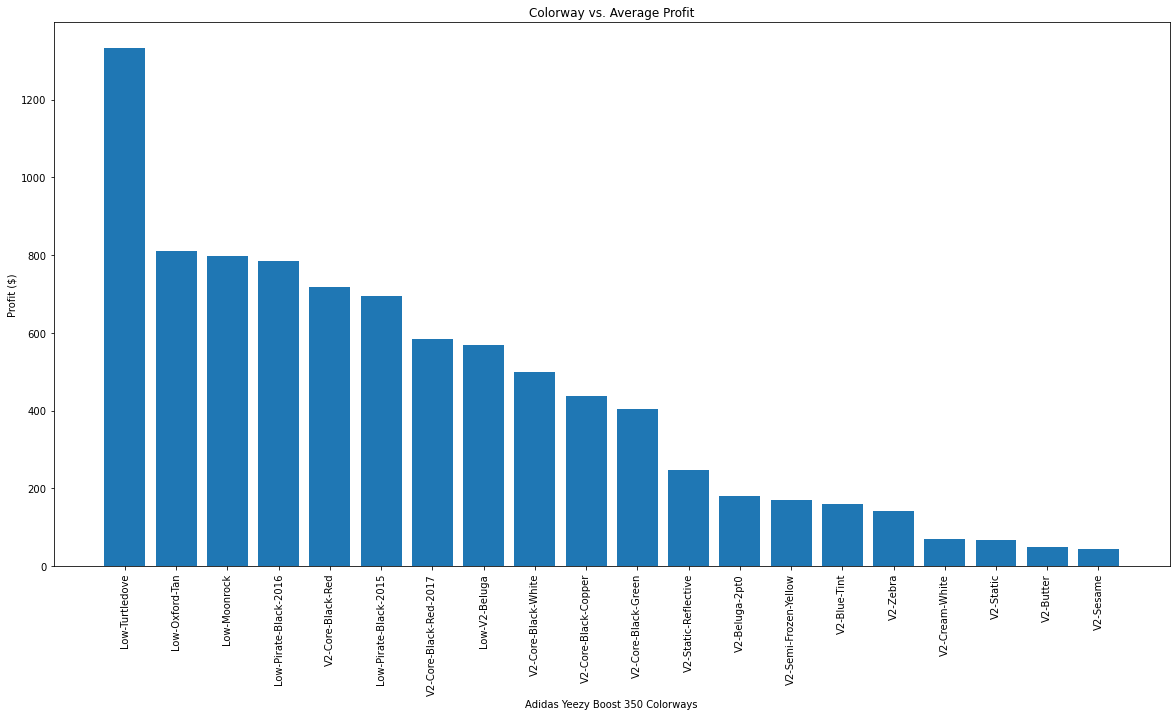

In [5]:
# bar graph to show colorway vs. avg proft
colorway_avg_noindex = colorway_avg.reset_index()

x_axis = colorway_avg_noindex["Colorway"]
y_axis = colorway_avg_noindex["Profit"]

plt.figure(figsize=(20,10))
plt.bar(x_axis, y_axis)
plt.title("Colorway vs. Average Profit")
plt.xlabel("Adidas Yeezy Boost 350 Colorways")
plt.xticks(rotation=90)
plt.ylabel("Profit ($)")
plt.show()

# <b>Is there a significant difference in profit between shoe size and profit?<b>

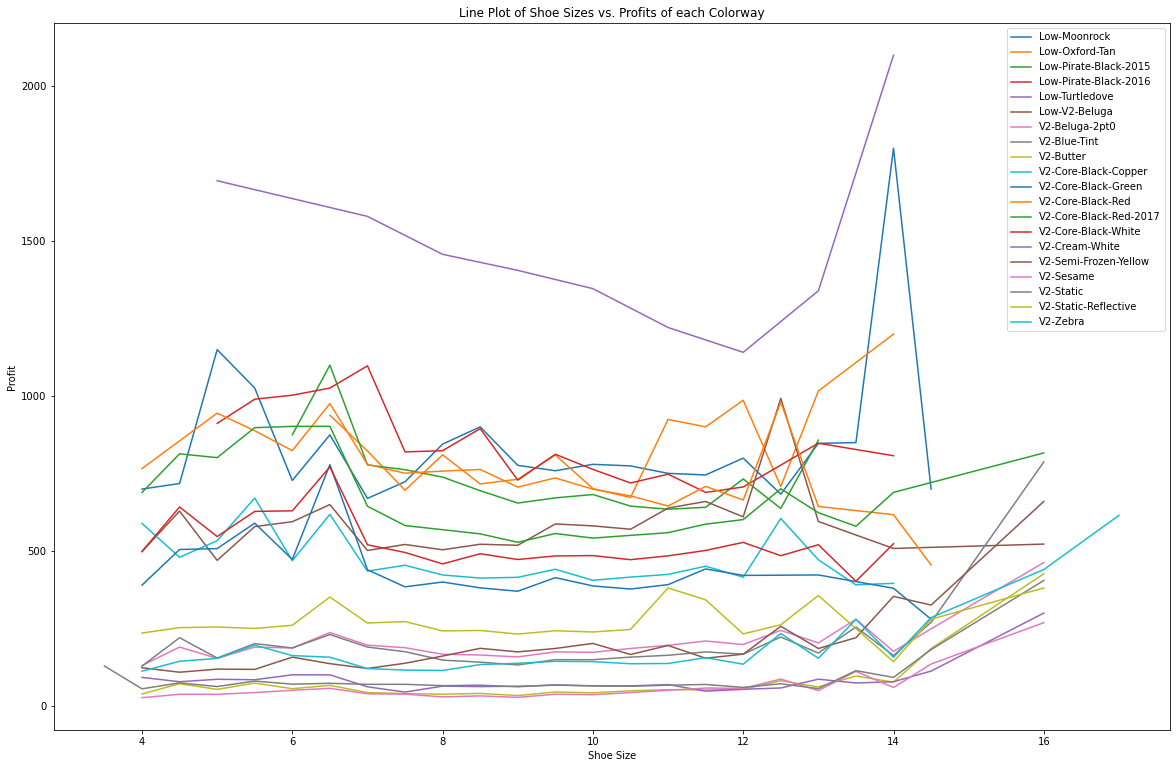

In [6]:
colorway_ss = yeezy_stockx.groupby(["Colorway", "Shoe Size"])
colorway_ss_group = colorway_ss.mean()

colorway_ss_sort = colorway_ss_group.reset_index()

#Creating a dictionary to create and store a new database for each colorway
unique_colorway = colorway_ss_sort["Colorway"].unique()

total_dict = {}

for x in unique_colorway:
    specific_shoe_size_data = []
    specific_profit_data = []

    dict = {}

    for index, rows in colorway_ss_sort.iterrows():

        if x == rows["Colorway"]:
            specific_shoe_size_data.append(rows["Shoe Size"])
            specific_profit_data.append(rows["Profit"])

    for size in specific_shoe_size_data:

        for profit in specific_profit_data:
            dict[size] = profit
            specific_profit_data.remove(profit)
            break

    total_dict[x] = pd.DataFrame.from_dict(dict, orient='index')
    total_dict[x] = total_dict[x].reset_index()
    total_dict[x] = total_dict[x].rename(columns={"index": "Shoe Size", 0: "Profit"})

#Using each colorway database to create a line graph for each colorway

plt.figure(figsize=(20,13))
plt.title("Line Plot of Shoe Sizes vs. Profits of each Colorway")
plt.xlabel("Shoe Size")
plt.ylabel("Profit")
for x in unique_colorway:

    x_axis = total_dict[x][["Shoe Size"]]
    y_axis = total_dict[x][["Profit"]]

    plt.plot(x_axis, y_axis, label=x)
    plt.legend()
    


# <b>Does region impact profit margin?<b>

In [7]:
yeezy_stockx

,Order Date,Brand,Sneaker Name,Colorway,Sale Price,Retail Price,Profit,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,Low-V2-Beluga,1097.0,220.0,877.0,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,V2-Core-Black-Copper,685.0,220.0,465.0,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,V2-Core-Black-Green,690.0,220.0,470.0,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,V2-Core-Black-Red,1075.0,220.0,855.0,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,V2-Core-Black-Red-2017,828.0,220.0,608.0,11.0,Rhode Island
...,...,...,...,...,...,...,...,...,...
99951,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,V2-Static-Reflective,565.0,220.0,345.0,8.0,Oregon
99952,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,V2-Static-Reflective,598.0,220.0,378.0,8.5,California
99953,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,V2-Static-Reflective,605.0,220.0,385.0,5.5,New York
99954,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,V2-Static-Reflective,650.0,220.0,430.0,11.0,California


In [9]:
region_group = yeezy_stockx.groupby(["Buyer Region"])
region_group.count()

,Order Date,Brand,Sneaker Name,Colorway,Sale Price,Retail Price,Profit,Shoe Size
Buyer Region,,,,,,,,
Alabama,375,375,375,375,375,375,375,375
Alaska,41,41,41,41,41,41,41,41
Arizona,1005,1005,1005,1005,1005,1005,1005,1005
Arkansas,141,141,141,141,141,141,141,141
California,13113,13113,13113,13113,13113,13113,13113,13113
Colorado,702,702,702,702,702,702,702,702
Connecticut,844,844,844,844,844,844,844,844
Delaware,818,818,818,818,818,818,818,818
District of Columbia,190,190,190,190,190,190,190,190
